# Problem

The occurence of small numbers in factors answered by Kasiski analysis is too abundant.
For example, no matter the key length is, the dominance of numbers 3 or 4 always distort the result of Kasiski analysis. As a result, entropy analysis cannot work (entropy analysis needs good N)!

In [5]:
factors_4 = { 3:10 , 4:15 , 5:6  , 6:6  , 7:4  , 8:8  , 9:3  , 10:5 , 11:4 , 12:3 , 13:5 , 14:2 , 15:1 , 16:3 , 17:3 , 18:1 , 19:1 , 20:3 , 22:3 , 23:3 , 24:1}
print(sorted(factors_4.items(), key=lambda x: x[1], reverse=True))

[(4, 15), (3, 10), (8, 8), (5, 6), (6, 6), (10, 5), (13, 5), (7, 4), (11, 4), (9, 3), (12, 3), (16, 3), (17, 3), (20, 3), (22, 3), (23, 3), (14, 2), (15, 1), (18, 1), (19, 1), (24, 1)]


In [7]:
factors_6 = {3: 11, 4: 5, 5: 10, 6: 6, 7: 5, 8: 2, 9: 4, 10: 3, 11: 2, 12: 3, 13: 2, 14: 2, 15: 4, 16: 2, 17: 2, 18: 2, 20: 1, 21: 2, 22: 1, 23: 2, 24: 1}
print(sorted(factors_6.items(), key=lambda x: x[1], reverse=True))

[(3, 11), (5, 10), (6, 6), (4, 5), (7, 5), (9, 4), (15, 4), (10, 3), (12, 3), (8, 2), (11, 2), (13, 2), (14, 2), (16, 2), (17, 2), (18, 2), (21, 2), (23, 2), (20, 1), (22, 1), (24, 1)]


In [8]:
factors_8 = { 3:11, 4:6 , 5:4 , 6:5 , 7:2 , 8:1 , 9:3 , 10:1, 11:5, 12:2, 14:1, 15:2, 16:1, 17:1, 18:1, 19:1, 20:1, 22:3 }
print(sorted(factors_8.items(), key=lambda x: x[1], reverse=True))

[(3, 11), (4, 6), (6, 5), (11, 5), (5, 4), (9, 3), (22, 3), (7, 2), (12, 2), (15, 2), (8, 1), (10, 1), (14, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]


In [9]:
factors_12 = { 3:11, 4:6 , 5:4 , 6:2 , 7:4 , 8:1 , 9:4 , 10:1, 11:2, 13:3, 14:2, 15:1, 18:2, 19:1, 20:1, 21:2, 23:2, }
print(sorted(factors_12.items(), key=lambda x:x[1], reverse=True))

[(3, 11), (4, 6), (5, 4), (7, 4), (9, 4), (13, 3), (6, 2), (11, 2), (14, 2), (18, 2), (21, 2), (23, 2), (8, 1), (10, 1), (15, 1), (19, 1), (20, 1)]


In [10]:
factors_17 = { 3:1 , 6:1 , 7:2 , 9:1 , 13:1, 14:1, 17:1, 18:1}
print(sorted(factors_17.items(), key=lambda x:x[1], reverse=True))

[(7, 2), (3, 1), (6, 1), (9, 1), (13, 1), (14, 1), (17, 1), (18, 1)]


In [11]:
factors_24 = { 3:6, 4:3  , 5:4  , 6:1  , 7:1  , 8:2  , 9:3  , 10:2 , 11:1 , 12:1 , 14:1 , 15:1 , 16:1, 20:2, 23:2, }
print(sorted(factors_24.items(), key=lambda x:x[1], reverse=True))

[(3, 6), (5, 4), (4, 3), (9, 3), (8, 2), (10, 2), (20, 2), (23, 2), (6, 1), (7, 1), (11, 1), (12, 1), (14, 1), (15, 1), (16, 1)]


To overcome this, we have to penalize the occurence of small numbers in factors,
while compensating for the occurence of large numbers in factors.
We will try using a log function to penalize the occurence of small numbers in factors by a large amount,
while compensating for the occurence of large numbers in factors by a small amount.

In [15]:
import matplotlib.pyplot as plt
import numpy as np

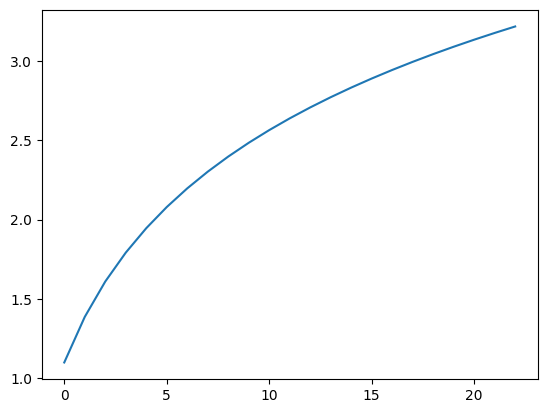

In [34]:
X = np.arange(3, 26)
plt.plot(np.log(X))

In [76]:
def score(f, cnt):
    return cnt * (1 + np.log(f-2))

def plot_factors_adjusted(factors):
    for f, cnt in factors.items():
        plt.plot(f, score(f, cnt), 'o')
        plt.annotate(f, (f, score(f, cnt)))
    for h in range(5, 25, 5):
        plt.axhline(h, linestyle='--', color='gray')

{3: 10, 4: 15, 5: 6, 6: 6, 7: 4, 8: 8, 9: 3, 10: 5, 11: 4, 12: 3, 13: 5, 14: 2, 15: 1, 16: 3, 17: 3, 18: 1, 19: 1, 20: 3, 22: 3, 23: 3, 24: 1}


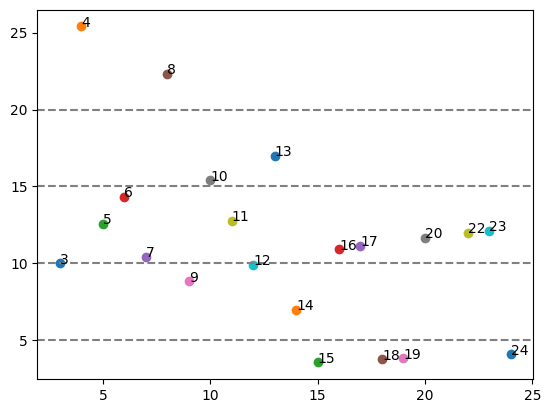

In [77]:
print(factors_4)
plot_factors_adjusted(factors_4)

{3: 11, 4: 5, 5: 10, 6: 6, 7: 5, 8: 2, 9: 4, 10: 3, 11: 2, 12: 3, 13: 2, 14: 2, 15: 4, 16: 2, 17: 2, 18: 2, 20: 1, 21: 2, 22: 1, 23: 2, 24: 1}


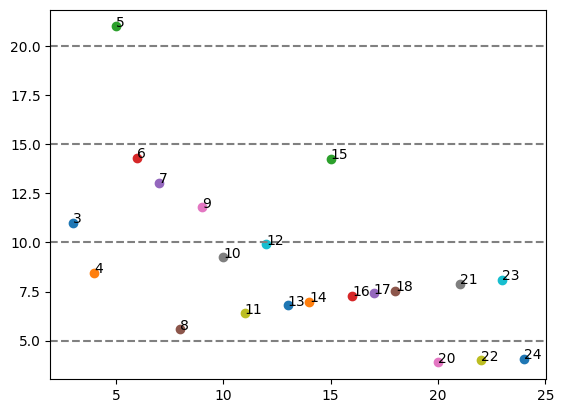

In [78]:
print(factors_6)
plot_factors_adjusted(factors_6)

{3: 11, 4: 6, 5: 4, 6: 5, 7: 2, 8: 1, 9: 3, 10: 1, 11: 5, 12: 2, 14: 1, 15: 2, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 22: 3}


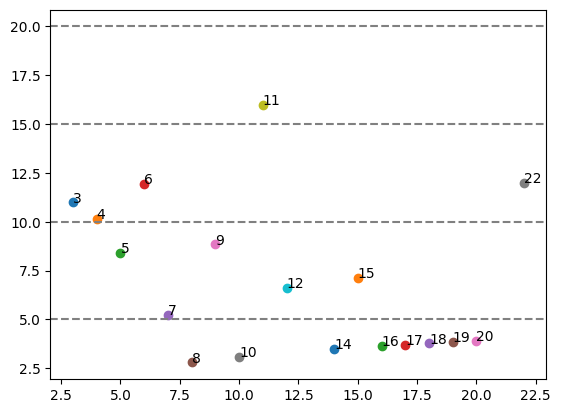

In [82]:
print(factors_8)
plot_factors_adjusted(factors_8)

{3: 11, 4: 6, 5: 4, 6: 2, 7: 4, 8: 1, 9: 4, 10: 1, 11: 2, 13: 3, 14: 2, 15: 1, 18: 2, 19: 1, 20: 1, 21: 2, 23: 2}


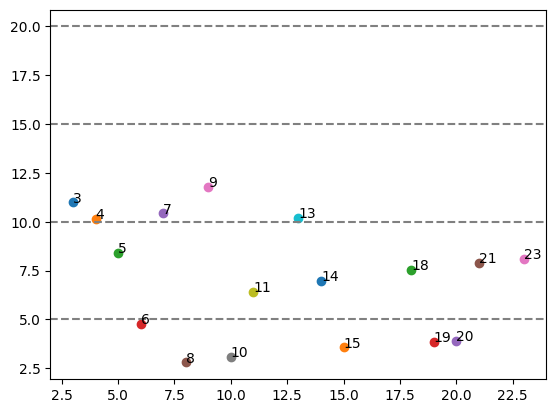

In [83]:
print(factors_12)
plot_factors_adjusted(factors_12)

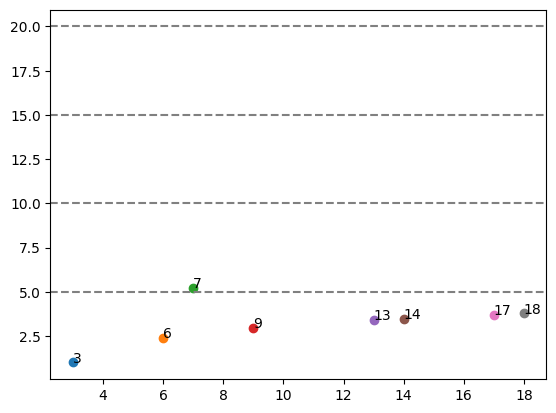

In [84]:
plot_factors_adjusted(factors_17)

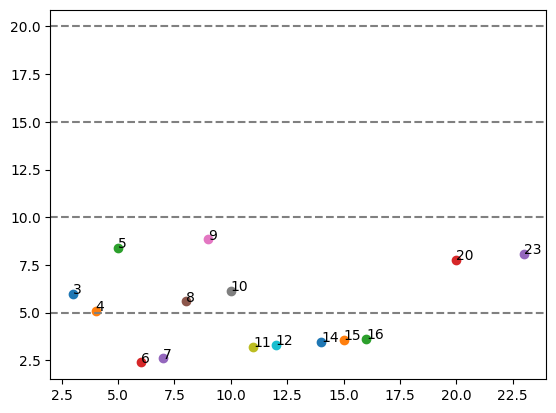

In [85]:
plot_factors_adjusted(factors_24)

In [4]:
from collections import defaultdict

keys = range(4, 25)

def load_ciphers():
    ciphers = defaultdict(list)
    for key_len in keys:
        for correct in range(1, 6):
            filename = f'resources/key_{key_len}/cipher_{correct}'
            with open(filename, 'r') as f:
                ciphers[key_len].append(f.readline().strip())
    return ciphers

plains = [
    "barmiest hastes spades fevers cause wisped unconquerable tropical pythagoras rebukingly price ephedra overdecorates linked smitten trickle scanning cognize oaken casework politicize significate influenceable precontrived clockers defalcation workwomen splintery kids placidness harebrained liberalism neuronic clavierist attendees matinees prospectively bubbies longitudinal raving relaxants rigged oxygens chronologist briniest tweezes profaning abeyances fixity gulls coquetted budgerigar drooled unassertive shelter subsoiling surmounted underwear jobbed hobnailed fulfilling jaywalking testabilit",
    "denunciation chronaxy imperilment incurred defrosted protectorates committeemen refractory narcissus bridlers weathercocks occluding orchectomy syncoms beamy opticopupillary acculturation scouting headstrong tosh preconscious weekday reich saddler mercerizes saucepan bifold regenerate chit reviewable easiness brazed essentially idler dependable predicable locales rededicated cowbird kvetched confusingly airdrops dreggier privileges tempter anaerobes glistened sartorial distrustfulness papillary ughs proctoring duplexed pitas traitorously unlighted cryptographer odysseys metamer either meliorat",
    "trenched wickerwork orientation candidnesses nets opalescing pharynxes recompensive incomes shoes porcine pursue blabbered irritable ballets grabbed scything oscillogram despots disarraying curiousest crappier friending wining cypher insubmissive oceanid bowlegs voider recook parochial trop gravidly vomiting hurray friended uncontestable situate fen cyclecars gads macrocosms dhyana overruns impolite europe cynical jennet tumor noddy canted clarion opiner incurring knobbed planeload megohm dejecting campily dedicational invaluable praecoces coalescence dibbuk bustles flay acuities centimeters l",
    "angle obliquely bean mariachi walkup toilettes squib tightwads pipe extents rejoicing nectar asker dreadfuls kidnappers interstate incrusting quintessential neglecter copycat phosphatic streakier frowning phantasmagories supinates imbibers inactivates tingly deserter steerages beggared pulsator laity salvageable bestrode interning stodgily cracker excisions quanted arranges poultries sleds shortly packages apparat fledge alderwomen halvah verdi ineffectualness entrenches franchising merchantability trisaccharide limekiln sportsmanship lassitudes recidivistic locating iou wardress estrus potboi",
    "schmeering institutor hairlocks speeder composers dramatics eyeholes progressives headmaster attractant subjugator peddlery vigil dogfights pixyish comforts aretes brewage felinities salerooms reminiscent hermaphrodism simultaneous spondaics hayfork armory refashioning battering darning tapper pancaked unaffected televiewer mussiness pollbook sieved reclines restamp cohosh excludes homelier coacts refashioned loiterer prospectively encouragers biggest pasters modernity governorships crusted buttoned wallpapered enamors supervisal nervily groaning disembody communion embosoming tattles turbans ",
]
    
ciphers = load_ciphers()

In [11]:
import numpy as np
import string

def compute_ic(text, alphabet=string.ascii_lowercase):
    """Compute the index of coincidence for a given text."""
    # Count the occurrences of each character in the text
    counts = np.array([text.count(char) for char in alphabet])

    # Compute the IC
    ic = np.sum(counts * (counts - 1)) / (len(text) * (len(text) - 1))
    
    return ic

def friedman_test(ciphertext, alphabet_size=26, ic_plaintext=0.067, ic_random=1/26):
    """Estimate the keyword length using the Friedman test."""
    ic_observed = compute_ic(ciphertext)
    
    # Calculate the denominator of the formula
    denominator = ic_plaintext - ic_observed
    
    # Check if the denominator is close to zero or negative, which would result in an invalid estimate
    if denominator <= 0:
        return "Failed to estimate a valid keyword length."
    
    keyword_length = ((alphabet_size - 1) * ic_observed - alphabet_size * ic_random) / denominator
    
    return (keyword_length)

for key, ciphers_of_key in ciphers.items():
    for cipher in ciphers_of_key:
        print(key, friedman_test(cipher.replace(' ', '')))



4 2.425254495705238
4 6.049194199869112
4 1.3651984466734925
4 2.4475797022371135
4 3.2642622914442825
5 1.3261900851798285
5 2.162840554516273
5 0.38391373430367515
5 -0.25067071353079856
5 0.6010227079950585
6 0.36423238025860266
6 2.075660700647026
6 0.6934536545211853
6 1.1952569955204357
6 0.47753418710657347
7 0.5132259971636565
7 0.41898646487284563
7 0.5935217278635941
7 -0.07035575237549753
7 1.237534000065484
8 0.14031832270324116
8 0.40550378279478483
8 -0.007718089078329379
8 -0.761525393942948
8 2.591062202316425
9 -1.056349064020205
9 -0.23149314044175082
9 0.14979182073918668
9 -0.7714109887061944
9 0.07875138188737829
10 -1.653680139021245
10 -0.6124475660299915
10 -0.2677190934850999
10 -1.3175919684483168
10 -0.07529546037725471
11 -0.9854594453271137
11 -1.2501478526098515
11 -1.040186354513092
11 -0.5217178358292364
11 -1.3638825884528258
12 -0.05136850881284134
12 -0.8035320900922232
12 -0.8723778642406264
12 -0.03626952823735633
12 0.15853129381044256
13 -1.062184